#Area to preprocess

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

climate_df = pd.read_csv("climate_change_indicators.csv")
climate_df

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [15]:
#check for any null values
climate_df.isna().sum()

,0
ObjectId,0
Country,0
ISO2,2
ISO3,0
Indicator,0
...,...
F2018,12
F2019,12
F2020,13
F2021,12


In [16]:
#checking for any duplicated values... prints them out if there is any
duplicated_rows = climate_df[climate_df.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [ObjectId, Country, ISO2, ISO3, Indicator, Unit, Source, CTS_Code, CTS_Name, CTS_Full_Descriptor, F1961, F1962, F1963, F1964, F1965, F1966, F1967, F1968, F1969, F1970, F1971, F1972, F1973, F1974, F1975, F1976, F1977, F1978, F1979, F1980, F1981, F1982, F1983, F1984, F1985, F1986, F1987, F1988, F1989, F1990, F1991, F1992, F1993, F1994, F1995, F1996, F1997, F1998, F1999, F2000, F2001, F2002, F2003, F2004, F2005, F2006, F2007, F2008, F2009, F2010, F2011, F2012, F2013, F2014, F2015, F2016, F2017, F2018, F2019, F2020, F2021, F2022]
Index: []

[0 rows x 72 columns]


Visualization here

#Possible questions
* net change
* average change of cost in all countries
* what countries showed the most positive/ negative
* top countries that show dramatic changes

In [17]:
import plotly.express as px

In [18]:
# Clean Data

# separate the world row from the climate data
# use later
def separate_world_country(climate_df):
    world_idx = climate_df.index[climate_df['Country'] == 'World'][0]
    world = climate_df.loc[world_idx]
    climate_df = climate_df.drop(world_idx)

    return climate_df, world


# remove useless columns
def remove_dumb_columns(climate_df, columns_to_drop):
    climate_df = climate_df.drop(columns=columns_to_drop)
    return climate_df

# remove rows with more than 15 nulls, does nothin if limit is less than 0
def remove_null_rows(climate_df, limit):
    if (limit < 0):
        null_df = climate_df.iloc[0:0]
        return climate_df, null_df


    null_counts = climate_df.isna().sum(axis=1)

    # then mask out the null rows and cleaned rows
    null_df = climate_df[null_counts > limit].copy()
    climate_df_cleaned = climate_df[null_counts <= limit].copy()

    return climate_df_cleaned, null_df


# cleans the data
# returns: cleaned_climate_df, null_df, year_columns, world
# cleaned_climate_df: the cleaned data
# null_df: any rows that were removed for having too many null values, if any
# year_columns: just a list of the year columns, for masking reasons
# world: the world row
def clean_data(climate_df, null_removal_limit, columns_to_drop):
    # remove any columns we wont need
    climate_df = remove_dumb_columns(climate_df, columns_to_drop)

    # remove rows with too many nulls
    cleaned_climate_df, null_df = remove_null_rows(climate_df, null_removal_limit)

    # get a list of the year columns
    year_columns = [col for col in climate_df.columns if col.startswith('F')]

    return cleaned_climate_df, null_df, year_columns

# Reload climate_df to ensure it's in its original state before cleaning
climate_df = pd.read_csv("climate_change_indicators.csv")

columns_to_drop = ['ObjectId', 'ISO2', 'Indicator', 'Unit', 'Source',  'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor']
columns_to_include = ['Country', 'ISO3']
null_limit = -1
climate_df, null_df, year_columns = clean_data(climate_df, null_limit, columns_to_drop)

In [19]:
# Net change
# get the net change (difference between earliest valid year and last valid year?
# or just 2022?

# gets the first and last valid temp for each country
def get_first_last(climate_df, year_columns):
    first_last_df = climate_df[columns_to_include].copy()

    years = climate_df[year_columns].copy()

    first_last_df['First_year'] = years.bfill(axis=1)['F1961']
    first_last_df['Last_year'] = years.ffill(axis=1)['F2022']

    return first_last_df


# gets the lowest and highest temp for each country
def get_min_max(climate_df, year_columns):
    min_max_df = climate_df[columns_to_include].copy()

    years = climate_df[year_columns].copy()

    min_max_df['Coldest'] = years.min(axis=1)
    min_max_df['Hottest'] = years.max(axis=1)

    return min_max_df

def get_first_last_avg(climate_df, year_columns, n=5):

    first_last_avg_df = climate_df[columns_to_include].copy()
    years = climate_df[year_columns].copy()

    # First n available values → scan left to right and take first n non-nulls
    first_last_avg_df['First_avg'] = (
        years
        .apply(lambda row: row.dropna().iloc[:n].mean(), axis=1)
    )

    # Last n available values → scan right to left and take last n non-nulls
    first_last_avg_df['Last_avg'] = (
        years
        .apply(lambda row: row.dropna().iloc[-n:].mean(), axis=1)
    )

    return first_last_avg_df


def get_net_change(climate_df, year_columns, method):
    net_change_df = climate_df[columns_to_include].copy()

    net_change_df = method(climate_df, year_columns)

    net_change_df['NetChange'] = net_change_df.iloc[:, 3] - net_change_df.iloc[:, 2]

    return net_change_df

#net_change_df = get_net_change(climate_df, year_columns, get_first_last)
net_change_df = get_net_change(climate_df, year_columns, get_first_last)
#net_change

In [20]:
# This code is currently not used, I might be able to remove it later?

# what countries showed the most positive/ negative
# just get the highest and lowest countries in the net change dataframe

# returns dataframe of top x countries by their net change
def get_top(climate_df, year_columns, amount, highest, method):
    net_change_df = get_net_change(climate_df, year_columns, method)

    highest_to_lowest_net_change_df = net_change_df.sort_values(by="NetChange", ascending=(not highest))

    top_amount_df = highest_to_lowest_net_change_df[:amount].copy()

    return top_amount_df



highest_df = get_top(climate_df, year_columns, 10, True, get_first_last)
#highest

lowest_df = get_top(climate_df, year_columns, 10, False, get_first_last)
#lowest


# get the countries with the least change, closest values to 0
def get_least_change(climate_df, year_columns, amount, method):
    net_change_df = get_net_change(climate_df, year_columns, method)

    sorted_abs_indexes = net_change_df['NetChange'].abs().sort_values(ascending=True).index
    least_change_df = net_change_df.reindex(sorted_abs_indexes)

    least_change_df = least_change_df[:amount].copy()

    return least_change_df

least_change_df = get_least_change(climate_df, year_columns, 10, get_first_last)
#least_change

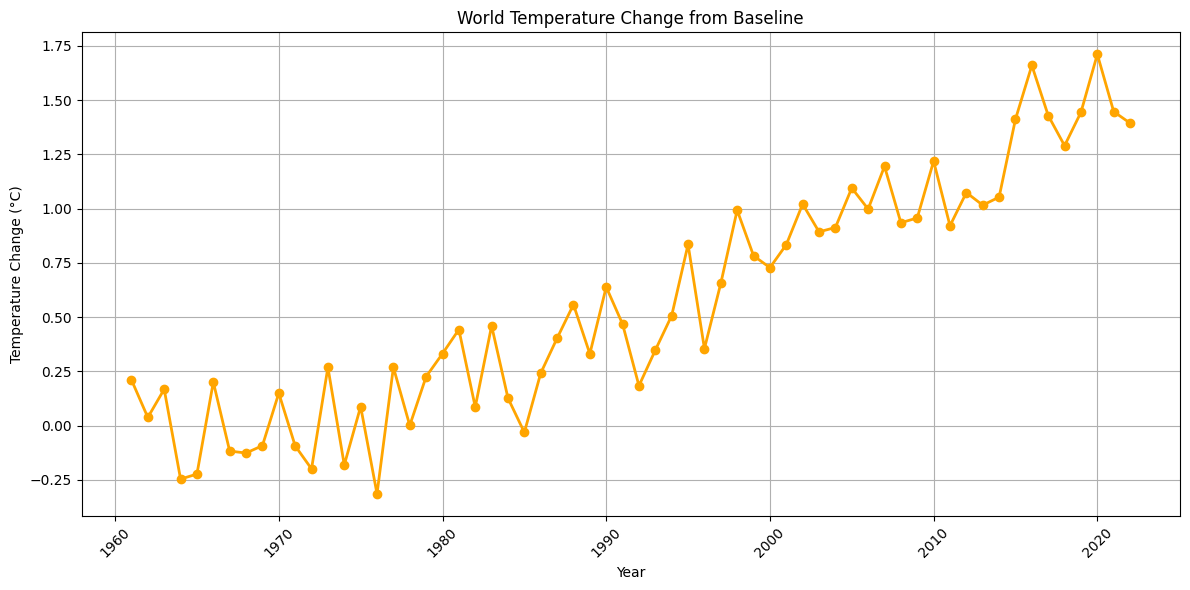

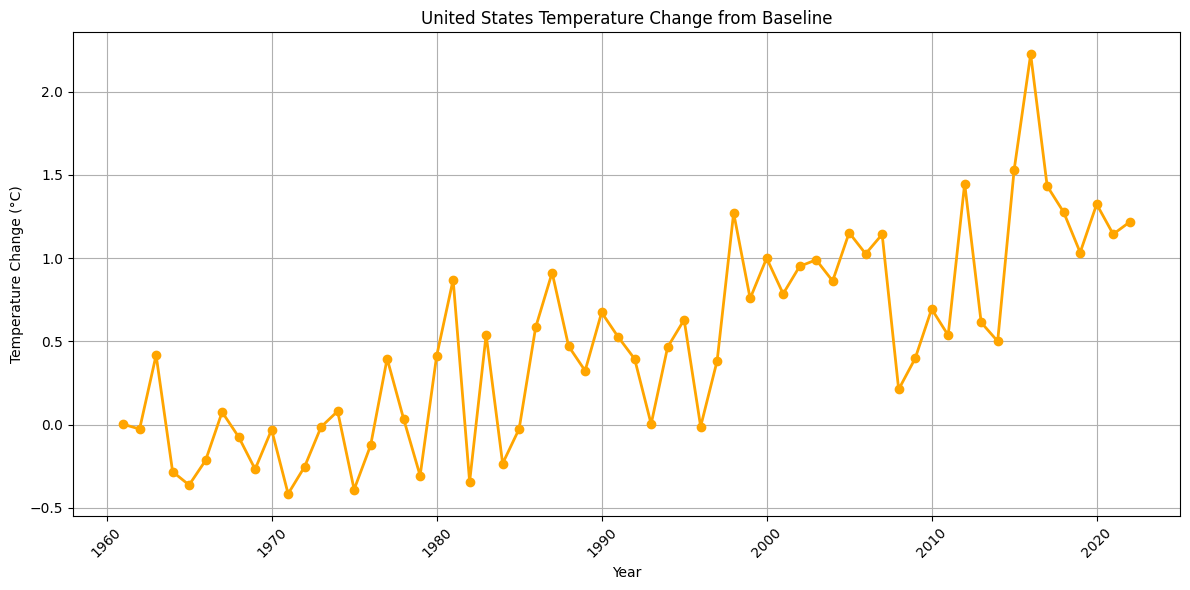

In [21]:
# display the temp over time, by year, for any country or the world

def display_temperature_time_graph(row):
    country = row['Country']
    row = row.drop('Country')
    row = row.drop('ISO3')

    years = row.index.str[1:].astype(int)  # remove 'F' and convert to int

    plt.figure(figsize=(12,6))
    plt.plot(years, row.values, marker='o', color='orange', linewidth=2)
    plt.title(f"{country} Temperature Change from Baseline")
    plt.xlabel("Year")
    plt.ylabel("Temperature Change (°C)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# display the world avg over time
world_idx = climate_df.index[climate_df['Country'] == 'World'][0]
world = climate_df.loc[world_idx]
display_temperature_time_graph(world)

# display usa
usa_idx = climate_df.index[climate_df['Country'] == 'United States'][0]
usa = climate_df.loc[usa_idx]
display_temperature_time_graph(usa)

In [22]:
# Get net change

net_change_min_max_df = get_net_change(climate_df, year_columns, get_min_max)
net_change_first_last_df = get_net_change(climate_df, year_columns, get_first_last)
net_change_first_last_avg_df = get_net_change(climate_df, year_columns, get_first_last_avg)
#net_change_min_max_df
#net_change_first_last_df
#net_change_first_last_avg_df

In [23]:
def show_world_net_change(net_change_df, label):
    net_change_df = net_change_df[['ISO3', 'NetChange', 'Country']]
    fig = px.choropleth(
        net_change_df,
        locations="ISO3",
        color="NetChange",
        hover_name="Country",
        color_continuous_scale="RdBu_r",
        title=f"Net Temperature Change by Country via {label}"
    )
    fig.show()
show_world_net_change(net_change_min_max_df, "Min-Max")
show_world_net_change(net_change_first_last_df, "First-Last")
show_world_net_change(net_change_first_last_avg_df, "First-Last-Avg")

In [24]:
# do another global map but with just the temps from a specific year

def show_world_year(climate_df, year, label):
    year_str = 'F' + str(year)

    climate_df = climate_df[['ISO3', 'Country', year_str]]

    fig = px.choropleth(
        climate_df,
        locations="ISO3",
        color=year_str,
        hover_name="Country",
        color_continuous_scale="RdBu_r",
        title=f"Heat map (i think) of temps in {label}"
    )
    fig.show()

show_world_year(climate_df, 1961, "1961")
show_world_year(climate_df, 2022, "2022")

# Task
Analyze the "climate_change_indicators.csv" dataset to identify the top N countries with the most significant positive and negative temperature changes, as well as the top N countries with the least overall temperature change. Visualize the temperature trends over time for a selection of these identified countries and summarize the findings.

## Identify Countries with Most Positive Change

### Subtask:
Identify the top N countries with the most significant positive temperature change using the `get_top` function with `highest=True`.


**Reasoning**:
To identify the top N countries with the most significant positive temperature change, I will call the `get_top` function with the specified parameters, including `highest=True`, and then display the resulting DataFrame.



In [25]:
most_positive_change_df = get_top(climate_df, year_columns, 10, True, get_first_last)
print("Top 10 countries with the most positive temperature change (First-Last method):")
print(most_positive_change_df)

Top 10 countries with the most positive temperature change (First-Last method):
                      Country ISO3  First_year  Last_year  NetChange
9            Armenia, Rep. of  ARM      -1.310      1.707      3.017
13        Azerbaijan, Rep. of  AZE      -0.839      2.080      2.919
142             New Caledonia  NCL      -0.248      2.421      2.669
73                    Georgia  GEO      -1.157      1.510      2.667
204              Turkmenistan  TKM      -0.059      2.528      2.587
107               Kyrgyz Rep.  KGZ       0.093      2.619      2.526
4    Andorra, Principality of  AND       0.736      3.243      2.507
106                    Kuwait  KWT      -0.225      2.275      2.500
15        Bahrain, Kingdom of  BHR      -0.471      2.017      2.488
214       Uzbekistan, Rep. of  UZB       0.150      2.607      2.457
